In [51]:
ls ..

content/           masks_public/      sample_submission/ utils/
data.zip           notebooks/         submissions/
masks/             public_test/       train/


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [85]:
IM_FOLDER = '../train/images'
TRAIN_MASK = '../masks/'
PUBLIC_MASK = '../masks_public/'

OUT_TRAIN_MASK = '../semantic_masks/'
OUT_PUBLIC_MASK = '../semantic_masks_public/'

In [54]:
train_df = pd.read_csv('../train/train_meta.csv')
test_df = pd.read_csv('../public_test/public_test_meta.csv')

In [55]:
train_df

image_id     fname  mask  distancing   5k
0            1     1.jpg   1.0         1.0  1.0
1            2     2.jpg   0.0         NaN  NaN
2            3     3.jpg   1.0         1.0  1.0
3            4     4.jpg   1.0         1.0  1.0
4            5     5.jpg   0.0         0.0  0.0
...        ...       ...   ...         ...  ...
4170      4171  4171.jpg   0.0         1.0  0.0
4171      4172  4172.jpg   1.0         1.0  1.0
4172      4173  4173.jpg   1.0         NaN  NaN
4173      4174  4174.jpg   1.0         1.0  1.0
4174      4175  4175.jpg   1.0         1.0  1.0

[4175 rows x 5 columns]

In [79]:
def read_and_show(path, label, show_mask=True):
    im = plt.imread(path)
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(im)
    plt.title(str(label.tolist()))
    
    if(show_mask):
        masks = np.load(TRAIN_MASK + '/' + str(ex.image_id) + '.npy')
        masks = masks.sum(axis=0) > 0
        plt.subplot(1,2,2)
        plt.imshow(masks)

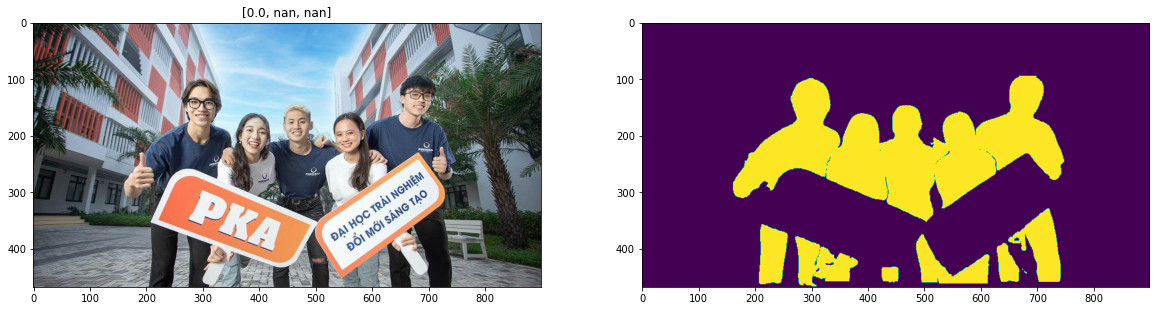

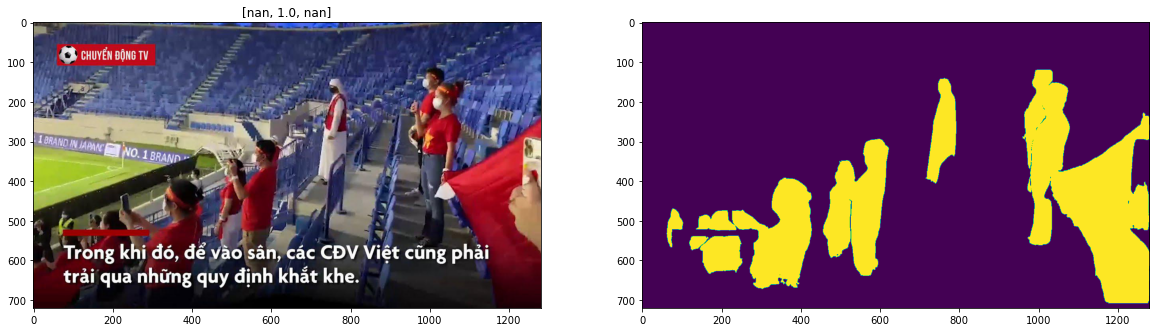

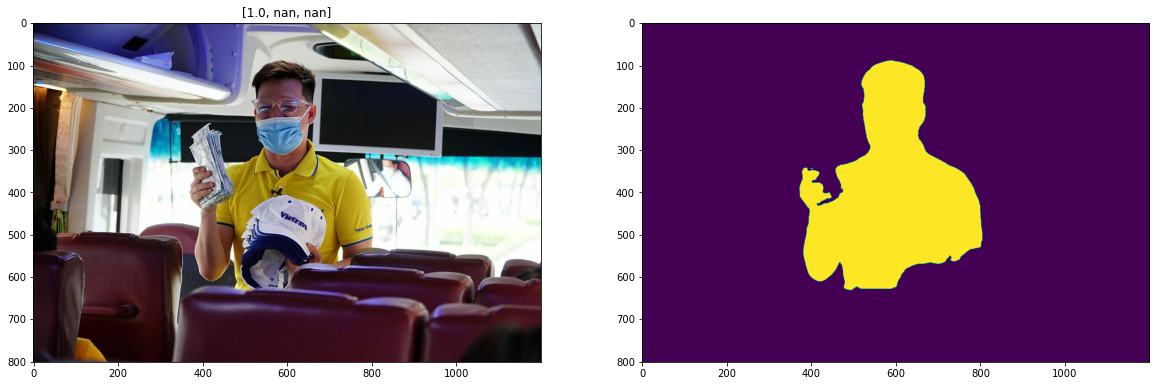

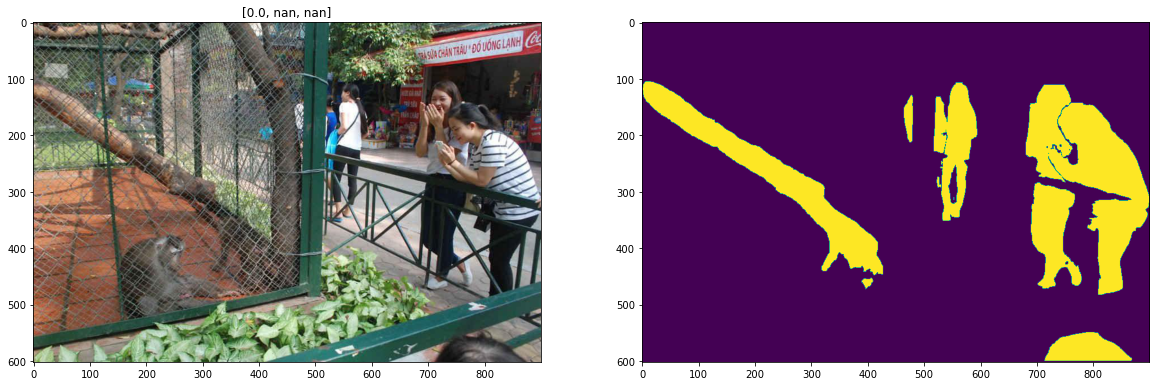

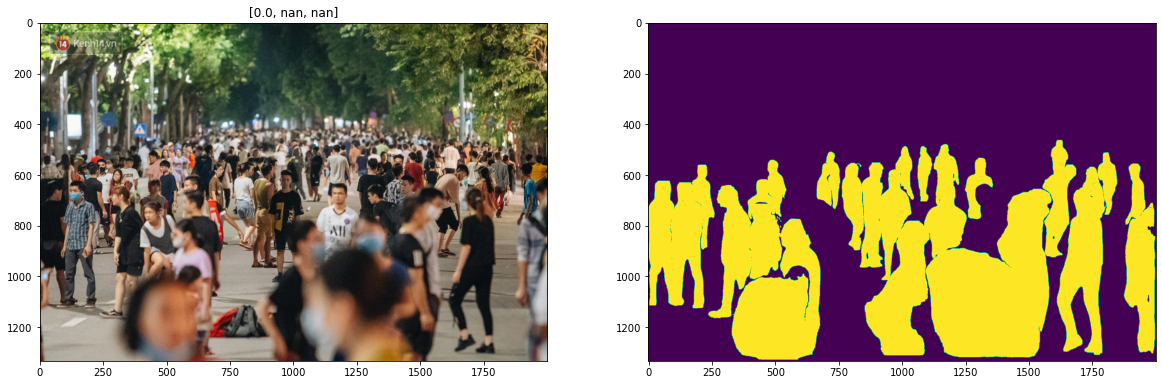

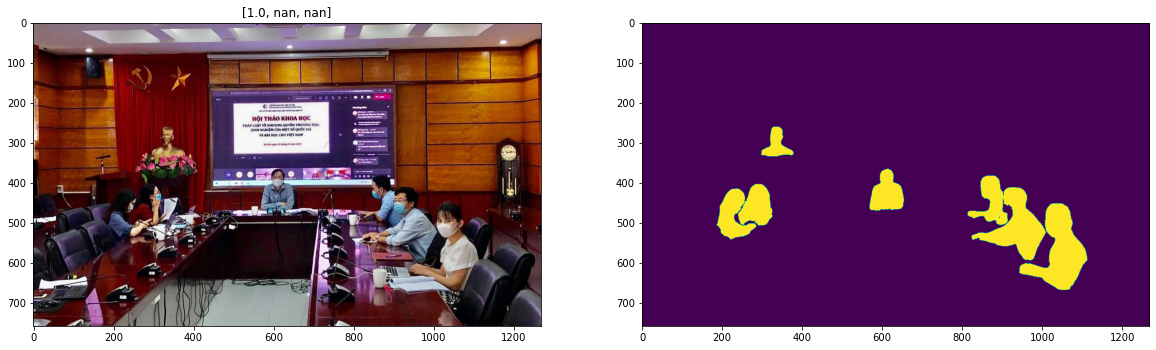

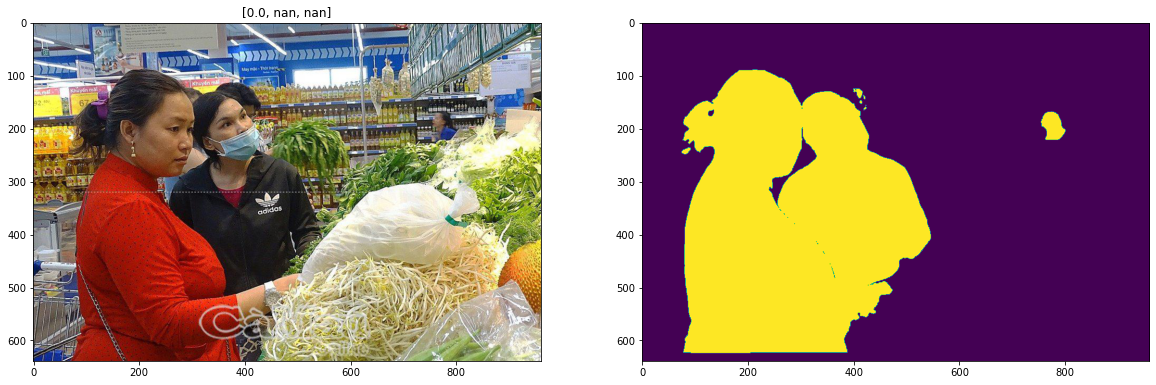

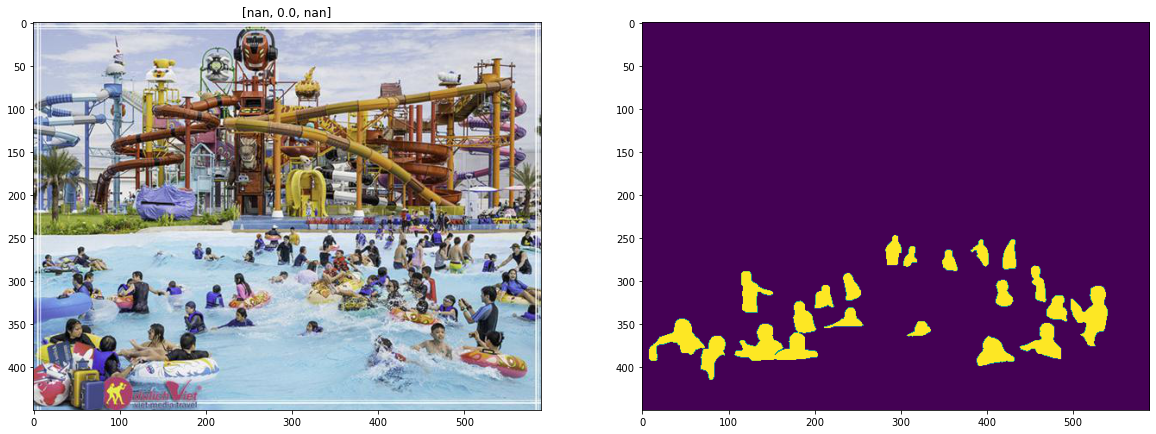

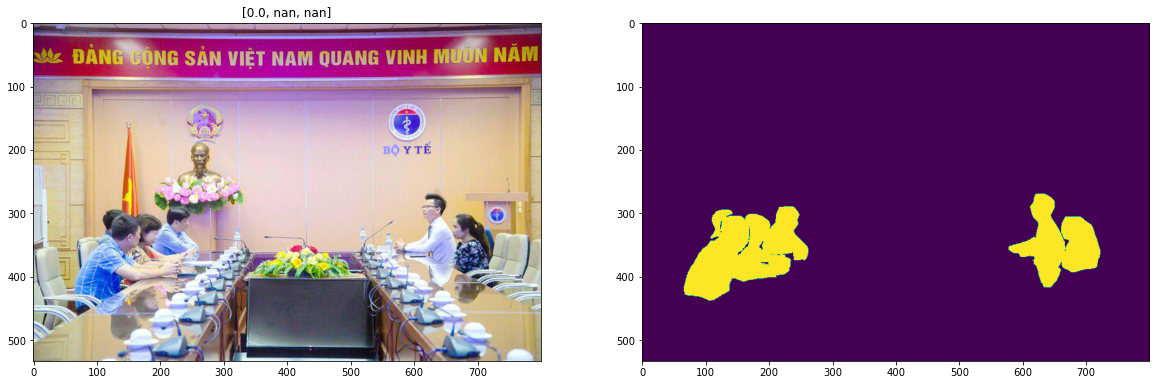

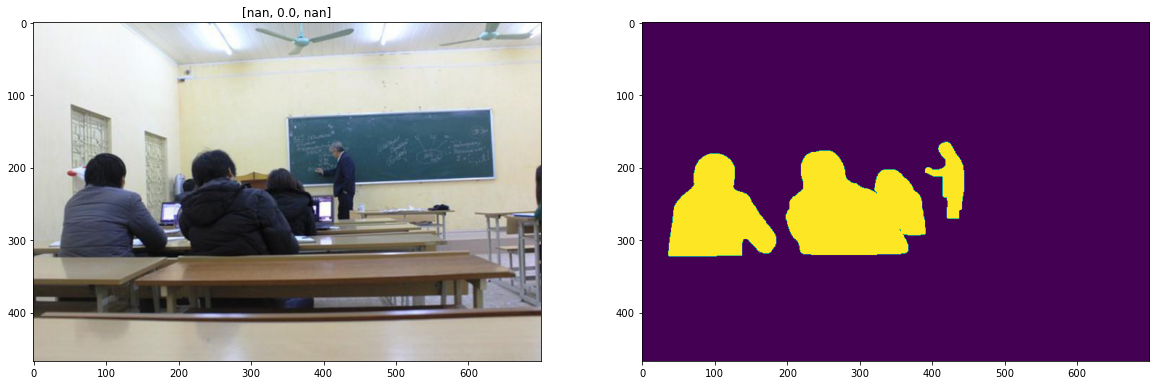

In [80]:
for i in range(10):
    ex = train_df[train_df['5k'].isnull()].sample(1).iloc[0]
    path = os.path.join(IM_FOLDER, ex.fname)
    read_and_show(path, ex[['mask', 'distancing', '5k']])
    

In [100]:
from tqdm.notebook import tqdm
import cv2

In [102]:
os.makedirs(OUT_TRAIN_MASK, exist_ok=True)
for i in tqdm(range(len(train_df))):
    ex = train_df.iloc[i]
    masks = np.load(TRAIN_MASK + '/' + str(ex.image_id) + '.npy')
    masks = (masks.sum(axis=0) > 0 ).astype(int) * 255
    outpath = os.path.join(OUT_TRAIN_MASK, str(ex.image_id) + '.jpg' )
    cv2.imwrite(outpath, masks)
    

  0%|          | 0/4175 [00:00<?, ?it/s]

In [95]:
test_df

image_id    fname
0           1    1.jpg
1           2    2.jpg
2           3    3.jpg
3           4    4.jpg
4           5    5.jpg
..        ...      ...
537       538  538.jpg
538       539  539.jpg
539       540  540.jpg
540       541  541.jpg
541       542  542.jpg

[542 rows x 2 columns]

In [104]:
os.makedirs(OUT_PUBLIC_MASK, exist_ok=True)
for i in tqdm(range(len(test_df))):
    ex = train_df.iloc[i]
    masks = np.load(PUBLIC_MASK + '/' + str(ex.image_id) + '.npy')
    masks = (masks.sum(axis=0) > 0 ).astype(int) * 255
    outpath = os.path.join(OUT_PUBLIC_MASK, str(ex.image_id) + '.jpg' )
    cv2.imwrite(outpath, masks)

  0%|          | 0/542 [00:00<?, ?it/s]

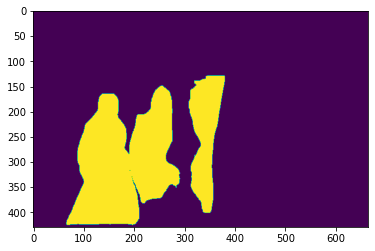

In [105]:
plt.imshow(masks)